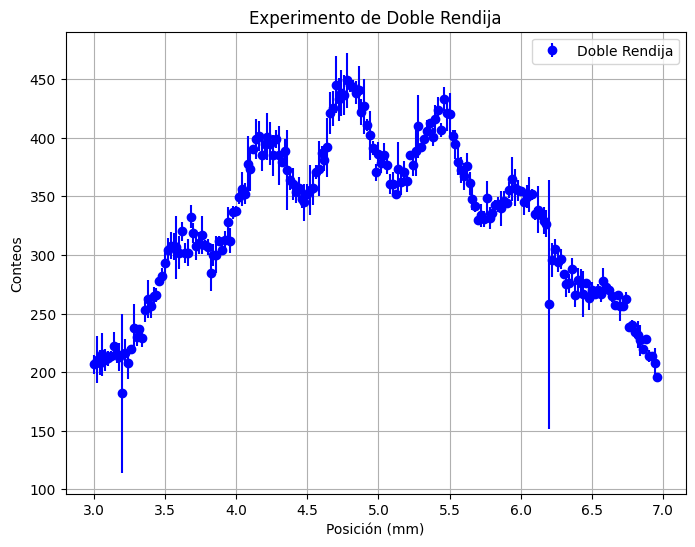

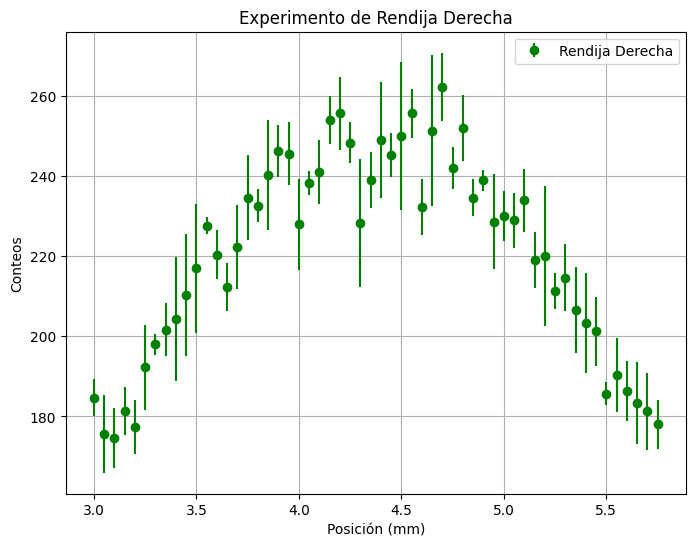

Longitud de onda para Doble Rendija: 0.004841828192945305 +/- 5.391791386274481e-12 mm
Longitud de onda para Rendija Simple: 0.003700947660172099 +/- 7.053903959812324e-12 mm


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lee los datos desde el archivo Excel
archivo_doble_rendija = 'Actividad 3_1-2.xlsx'
datos_doble_rendija = pd.read_excel(archivo_doble_rendija)

# Parámetros de error
error_multimetro = 0.1  # Incertidumbre del multimetro en voltios
error_posicion = 0.005  # Incertidumbre de la posición en mm

# Calcula el error total para los datos de doble rendija
datos_doble_rendija['Desviación DB'] = ((datos_doble_rendija['Desviación DB']**2) + (error_posicion**2))**0.5

# Grafica los datos de doble rendija con barras de error
plt.figure(figsize=(8, 6))
plt.errorbar(datos_doble_rendija['Posición DB'], datos_doble_rendija['Promedio DB'], yerr=datos_doble_rendija['Desviación DB'],
             fmt='o', color='b', label='Doble Rendija')
plt.xlabel('Posición (mm)')
plt.ylabel('Conteos')
plt.title('Experimento de Doble Rendija')
plt.legend()
plt.grid(True)
plt.show()

# Lee los datos desde el archivo Excel de la rendija derecha
archivo_rendija_derecha = 'Actividad 3_1-2 RS.xlsx'
datos_rendija_derecha = pd.read_excel(archivo_rendija_derecha)

longitud1=np.sqrt(max(datos_doble_rendija['Promedio DB']))*(d/2)
longitud2=np.sqrt(max(datos_rendija_derecha['Promedio RS']))*(d/2)

# Definir la distancia entre las rendijas (en metros)
d = 0.457e-3  # Por ejemplo, 0.457 mm convertido a metros

# Definir el error en la distancia entre las rendijas (en metros)
error_d = 0.001e-3  # Por ejemplo, 0.001 mm convertido a metros

# Calcular los errores para la longitud de onda
error_lambda_doble_rendija = (1/2) * (np.sqrt(1/(4*max(datos_doble_rendija['Promedio DB']))*error_V_doble_rendija**2 +
                                          (d/2)*error_d)**2) / np.sqrt(max(datos_doble_rendija['Promedio DB']))

error_lambda_rendija_simple = (1/2) * (np.sqrt(1/(4*max(datos_rendija_derecha['Promedio RS']))*error_V_rendija_simple**2 +
                                               (d/2)*error_d)**2) / np.sqrt(max(datos_rendija_derecha['Promedio RS']))
# Calcula el error total para los datos de rendija derecha
datos_rendija_derecha['Desviación RS'] = ((datos_rendija_derecha['Desviación RS']**2) + (error_posicion**2))**0.5

# Grafica los datos de rendija derecha con barras de error
plt.figure(figsize=(8, 6))
plt.errorbar(datos_rendija_derecha['Posición RS'], datos_rendija_derecha['Promedio RS'], yerr=datos_rendija_derecha['Desviación RS'],
             fmt='o', color='g', label='Rendija Derecha')
plt.xlabel('Posición (mm)')
plt.ylabel('Conteos')
plt.title('Experimento de Rendija Derecha')
plt.legend()
plt.grid(True)
plt.show()

print("Longitud de onda para Doble Rendija:", longitud1, "+/-", error_lambda_doble_rendija, "mm")
print("Longitud de onda para Rendija Simple:", longitud2, "+/-", error_lambda_rendija_simple, "mm")


Longitud de onda para Doble Rendija: 0.0027845141631889754 +/- 9.375471325922274e-12 mm
Longitud de onda para Rendija Simple: 0.0017372012117195866 +/- 1.5027703521225698e-11 mm


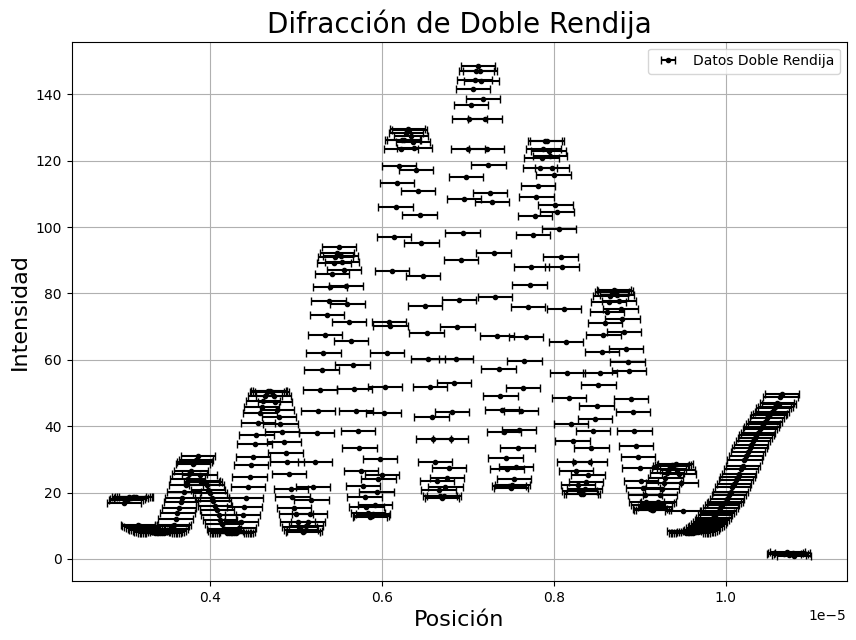

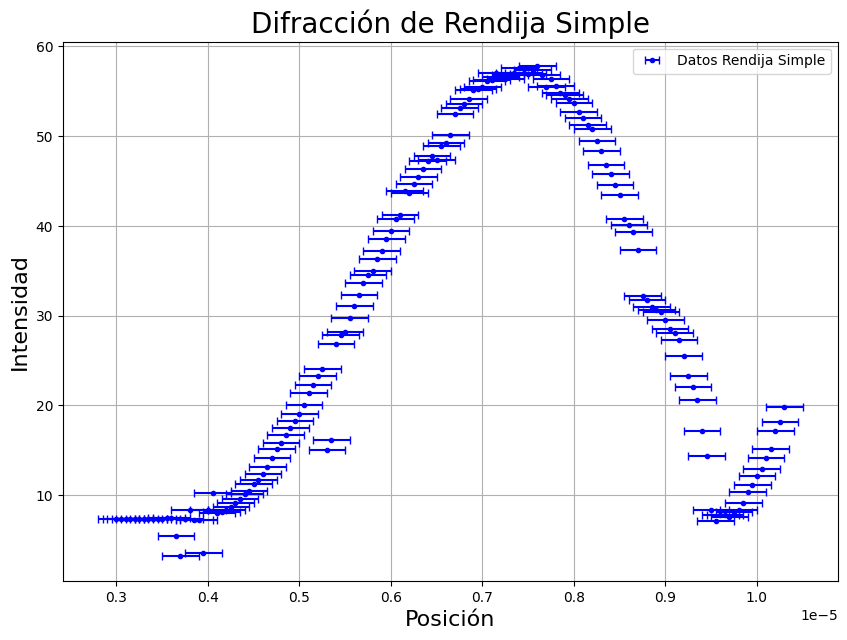

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution
import math  # Importa el módulo math para las operaciones matemáticas

# Rutas a los archivos Excel
ruta_doble_rendija = "Actividad 3_1-2.xlsx"
ruta_rendija_simple = "Actividad 3_1-2 RS.xlsx"

# Leer datos desde los archivos Excel usando pandas
doble_rendija = pd.read_excel(ruta_doble_rendija)
rendija_simple = pd.read_excel(ruta_rendija_simple)


# Obtener el valor máximo de intensidad para la doble rendija
I_max_doble_rendija = max(V_doble_rendija)

# Definir la distancia entre las rendijas (en metros)
d = 0.457e-3  # Por ejemplo, 0.457 mm convertido a metros

# Definir el error en la distancia entre las rendijas (en metros)
error_d = 0.001e-3  # Por ejemplo, 0.001 mm convertido a metros

# Calcular la longitud de onda para la doble rendija usando la fórmula: lambda = sqrt(I_max) * (d / 2)
lambda_doble_rendija = np.sqrt(I_max_doble_rendija) * (d / 2)

# Obtener el valor máximo de intensidad para la rendija simple
I_max_rendija_simple = max(V_rendija_simple)

# Calcular la longitud de onda para la rendija simple usando la fórmula: lambda = sqrt(I_max) * (d / 2)
lambda_rendija_simple = np.sqrt(I_max_rendija_simple) * (d / 2)

# Calcular los errores para la longitud de onda
error_lambda_doble_rendija = (1/2) * (np.sqrt(1/(4*I_max_doble_rendija)*error_V_doble_rendija**2 +
                                          (d/2)*error_d)**2) / np.sqrt(I_max_doble_rendija)

error_lambda_rendija_simple = (1/2) * (np.sqrt(1/(4*I_max_rendija_simple)*error_V_rendija_simple**2 +
                                               (d/2)*error_d)**2) / np.sqrt(I_max_rendija_simple)

# Imprimir los resultados con errores
print("Longitud de onda para Doble Rendija:", lambda_doble_rendija, "+/-", error_lambda_doble_rendija, "mm")
print("Longitud de onda para Rendija Simple:", lambda_rendija_simple, "+/-", error_lambda_rendija_simple, "mm")

# Gráfico para Doble Rendija
plt.figure(figsize=(10, 7))
plt.errorbar(micra_doble_rendija, V_doble_rendija, xerr=error_V_doble_rendija, c='k', label="Datos Doble Rendija", fmt='o', markersize=3, capsize=3)

plt.grid(True)
plt.legend()
plt.ylabel("Intensidad", fontsize="16")
plt.xlabel("Posición", fontsize="16")
plt.title("Difracción de Doble Rendija", fontsize="20")
plt.show()

# Gráfico para Rendija Simple
plt.figure(figsize=(10, 7))
plt.errorbar(micra_rendija_simple, V_rendija_simple, xerr=error_V_rendija_simple, c='b', label="Datos Rendija Simple", fmt='o', markersize=3, capsize=3)

plt.grid(True)
plt.legend()
plt.ylabel("Intensidad", fontsize="16")
plt.xlabel("Posición", fontsize="16")
plt.title("Difracción de Rendija Simple", fontsize="20")
plt.show()


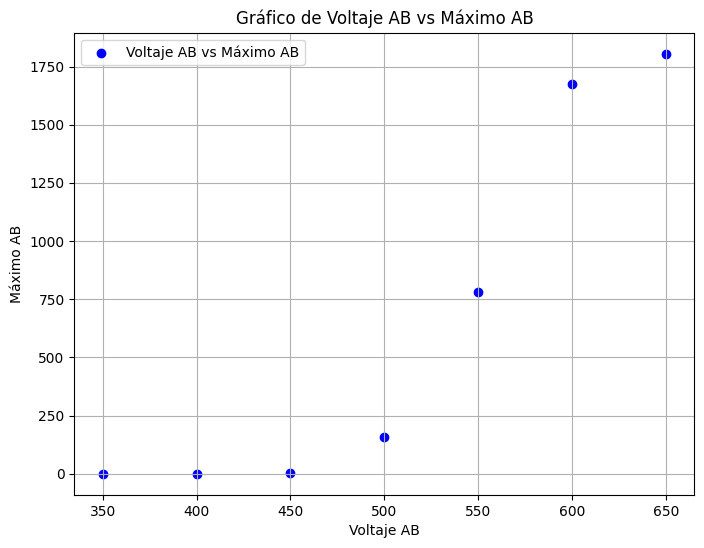

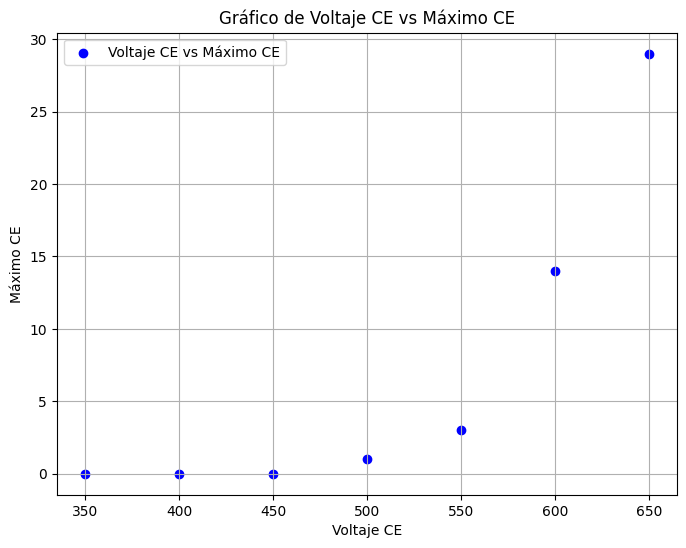

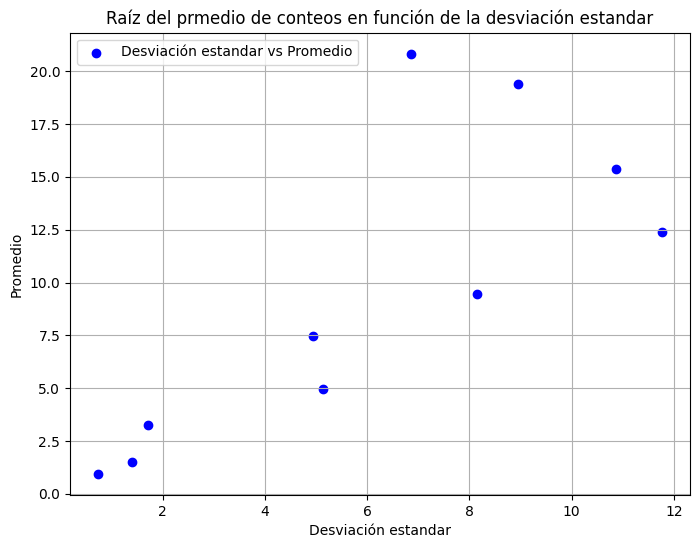

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

archivo_excel = 'Actividad 3_3.xlsx'
datos = pd.read_excel(archivo_excel)

columna_x = 'Voltaje AB'
columna_y = 'Máximo AB'

x = datos[columna_x]
y = datos[columna_y]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', label=f'{columna_x} vs {columna_y}', marker='o')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.title(f'Gráfico de {columna_x} vs {columna_y}')
plt.legend()
plt.grid(True)
plt.show()

archivo_excel = 'Actividad 3_3.xlsx'
datos = pd.read_excel(archivo_excel)

columna_x = 'Voltaje CE'
columna_y = 'Máximo CE'
x = datos[columna_x]
y = datos[columna_y]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', label=f'{columna_x} vs {columna_y}', marker='o')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.title(f'Gráfico de {columna_x} vs {columna_y}')
plt.legend()
plt.grid(True)
plt.show()

archivo_excel = 'Actividad 3_4.xlsx'
datos = pd.read_excel(archivo_excel)

columna_x = 'Desviación estandar'
columna_y = 'Promedio'

x = datos[columna_x]
y = datos[columna_y]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='b', label=f'{columna_x} vs {columna_y}', marker='o')
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.title(f'Raíz del prmedio de conteos en función de la desviación estandar')
plt.legend()
plt.grid(True)
plt.show()